In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nsample=20
x=np.linspace(0,10,nsample)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

# 一元线性回归

In [4]:
X=sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

b0 b1 分别设置为2，5

In [5]:
#
beta=np.array([2,5])
beta

array([2, 5])

误差项

In [6]:
e=np.random.normal(size=nsample)
e

array([-1.18681383, -1.25900614, -0.31557967, -1.81420049, -1.60398896,
       -0.7040118 ,  0.00387315, -0.85450918, -1.07566903, -0.95160221,
        3.40494406,  1.17522424,  0.3996122 ,  0.8261889 , -0.22756678,
        0.22155612,  0.54009927,  0.2460571 , -0.72993472, -1.19388393])

实际值

In [7]:
y=np.dot(X,beta)+e
e

array([-1.18681383, -1.25900614, -0.31557967, -1.81420049, -1.60398896,
       -0.7040118 ,  0.00387315, -0.85450918, -1.07566903, -0.95160221,
        3.40494406,  1.17522424,  0.3996122 ,  0.8261889 , -0.22756678,
        0.22155612,  0.54009927,  0.2460571 , -0.72993472, -1.19388393])

In [8]:
#最小二乘法
model=sm.OLS(y,X)

In [9]:
#拟合数据
res=model.fit()

In [10]:
#回归系数
res.params

array([1.06364388, 5.13627911])

In [11]:
#全部结果
#date表示线性关系
# const 常数项 x1斜率项
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3683.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           2.83e-22
Time:                        16:41:06   Log-Likelihood:                -30.098
No. Observations:                  20   AIC:                             64.20
Df Residuals:                      18   BIC:                             66.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0636      0.495      2.149      0.046       0.024       2.104
x1             5.1363      0.085     60.685      0.000       4.958       5.314
==============================================================================
Omnibus:                       17.597   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.944
Skew:                           1.635   Prob(JB):                     4.67e-05
Kurtosis:                       6.638   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 拟合估计值
y_=res.fittedvalues
y_

array([ 1.06364388,  3.76694867,  6.47025346,  9.17355826, 11.87686305,
       14.58016784, 17.28347264, 19.98677743, 22.69008222, 25.39338702,
       28.09669181, 30.7999966 , 33.5033014 , 36.20660619, 38.90991098,
       41.61321578, 44.31652057, 47.01982536, 49.72313016, 52.42643495])

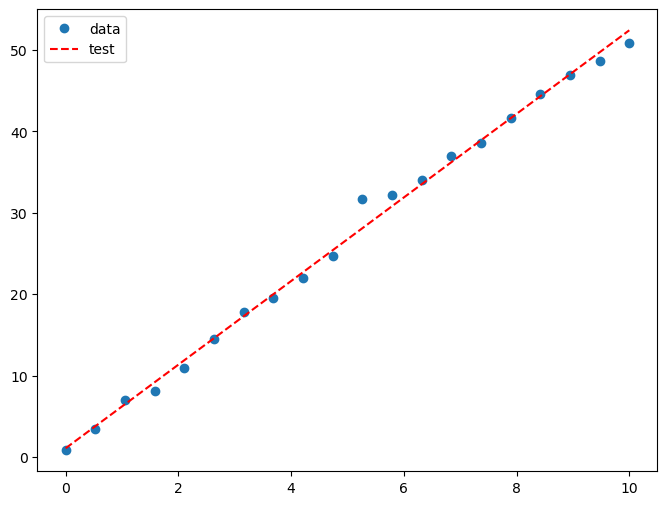

In [14]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')#原始数据
ax.plot(x,y_,'r--',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

# 高介回归

In [15]:
#y=5+2x+3x^2
nsample=50
x=np.linspace(0,10,nsample)
XX=np.column_stack((x,x**2))
XX=sm.add_constant(XX)

In [17]:
beta=np.array([5,2,3])
e=np.random.normal(size=nsample)
y=np.dot(XX,beta)+e#误差项
model=sm.OLS(y,XX)
result=model.fit()
result.params

array([5.16658368, 1.99070361, 3.00226847])

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.383e+05
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           7.18e-95
Time:                        17:56:32   Log-Likelihood:                -69.132
No. Observations:                  50   AIC:                             144.3
Df Residuals:                      47   BIC:                             150.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1666      0.406     12.736      0.000       4.350       5.983
x1             1.9907      0.188     10.611      0.000       1.613       2.368
x2             3.0023      0.018    165.477      0.000       2.966       3.039
==============================================================================
Omnibus:                        3.113   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.131
Skew:                           0.338   Prob(JB):                        0.345
Kurtosis:                       3.752   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

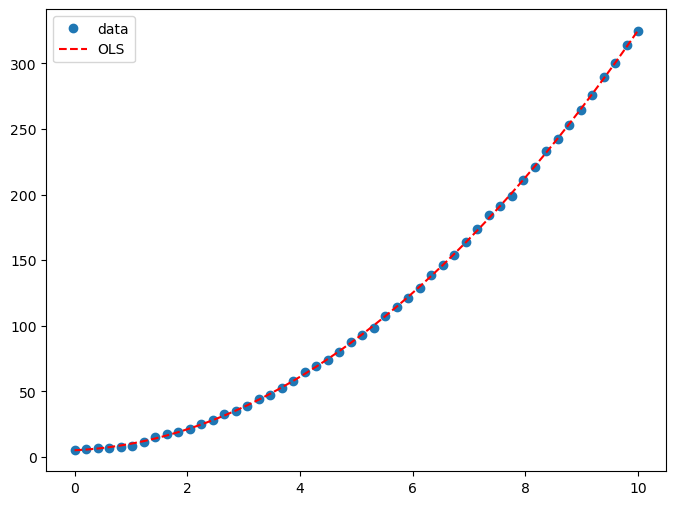

In [20]:
y_fitted=result.fittedvalues
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')
ax.plot(x,y_fitted,'r--',label='OLS')
ax.legend(loc='best')
plt.show()

# 分类变量
假设分类变量有3个取值abc，考试等级有优中差三个等级，那么a就是100，b（010，c：001这时候就需要三个系数b1，b2，b3也就是b0*0+b1*1+b2*2

In [32]:
nsampleFEN=50
groups=np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [33]:
groups[0:20]=0
groups[20:40]=1
groups[40:]=2
dummy=sm.categorical(groups,drop=True)
dummy

/Users/liuriyilang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [35]:
#Y=5+2X+3Z1+6*Z2+9*Z3
x=np.linspace(0,20,nsampleFEN)
X=np.column_stack((x,dummy))
X=sm.add_constant(X)
beta=[5,2,3,6,9]
e=np.random.normal(size=nsample)
y=np.dot(X,beta)+e
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3660.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.02e-54
Time:                        18:38:39   Log-Likelihood:                -65.390
No. Observations:                  50   AIC:                             138.8
Df Residuals:                      46   BIC:                             146.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9053      0.529     14.956      0.000       6.841       8.969
x1             2.0303      0.061     33.385      0.000       1.908       2.153
x2            -0.0415      0.335     -0.124      0.902      -0.716       0.633
x3             2.7013      0.280      9.643      0.000       2.137       3.265
x4             5.2455      0.631      8.312      0.000       3.975       6.516
==============================================================================
Omnibus:                       15.321   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.481
Skew:                          -1.205   Prob(JB):                     0.000160
Kurtosis:                       4.608   Cond. No.                     3.77e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.78e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

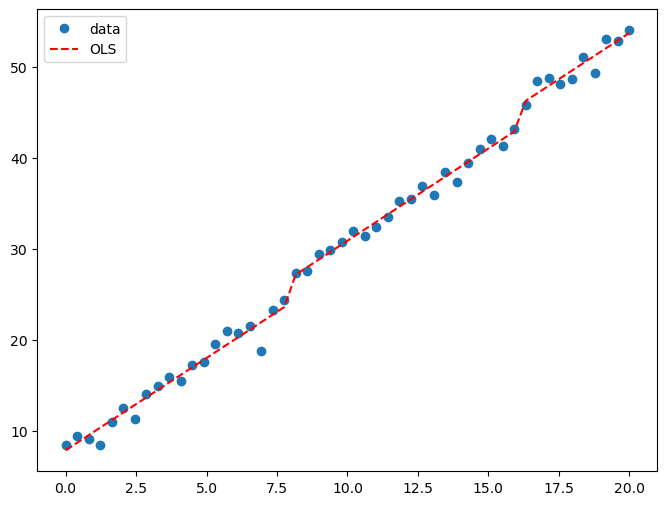

In [36]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')
ax.plot(x,result.fittedvalues,'r--',label='OLS')
ax.legend(loc='best')
plt.show()